# Project: NLP - Sentiment Analysis vua Recurrent Neural Networks and Transfer Learning:

## Sentiment Analysis:
* Sentiment analysis is the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral:
  -  Today, companies have large volumes of text data like emails, customer support chat transcripts, social media comments, and reviews.

## Dataset:
* IMDB dataset has 50,000 movie reviews for natural language processing or Text analytic:
  - http://ai.stanford.edu/~amaas/data/sentiment/

## Objectives:
* To use implment and evaluate the following sentiment analysis models:
  - Recurrent Neural Networks (RNN) model
  - Long-Short Term Memory (LSTM) model: MultiLayer and Bidirectional
  - Gated Recurrent Unit (GRU) model: MultiLayer and Bidirectional
  - 1-Dimensional convolution Neural Network model (1-D CNN)
  - Transfer learning using the pretrained embeddings of the Word2Vec pretrained model.

## Author: Mohsen Ghazel
* Date: July 13th, 2023

## 1. Initial Setup:
* Python Imports
* Global Variables Defintions
* Mounting Google Drive
* Check for GPU devices

## 1.1: Python Imports:

In [ ]:
# DL framework
import tensorflow as tf
# math computations
import numpy as np
# image processing
import cv2
from PIL import Image
# plotting bar chart
import matplotlib.pyplot as plt
# machine learning library: sklearn
import sklearn
from sklearn.metrics import confusion_matrix, roc_curve
# visalization
import seaborn as sns
# date and time
import datetime
import time
# path
import pathlib
# io/os
import io
import os
# regular expressions
import re
# string
import string
# random numbers generators
from numpy import random
# Downlaod the Word2Vec pretrained model
import gensim.downloader as api
# Tensflow datasets
import tensorflow_datasets as tfds
# Tensflow probabilities
import tensorflow_probability as tfp
# Tensorflow model
from tensorflow.keras.models import Model
# Tensorflow Layer
from tensorflow.keras.layers import Layer
# Tensorflow Layers
from tensorflow.keras.layers import (Dense,Flatten,SimpleRNN,InputLayer,Conv1D,Bidirectional,GRU,LSTM,BatchNormalization,Dropout,Input, Embedding,TextVectorization)
# Tensorflow Loss metrics
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
# Tensorflow metrics
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
# Optimzers
from tensorflow.keras.optimizers import Adam
# Tensorboard
from tensorboard.plugins import projector
# Print the Tensorflow version
print(tf.__version__)

2.12.0


## 1.2: Global Variables:

In [ ]:
# Batch-size
BATCH_SIZE = 64

# Vocabulary size
VOCAB_SIZE = 10000

# The sequence length:
SEQUENCE_LENGTH = 250

## 1.3. Mounting Google Drive

In [ ]:
# Mount my Google drive to access the input dataset and output directories
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.4: TensorFlow GPU Operations:
* TensorFlow refers to the CPU on your local machine as /device:CPU:0 and to the first GPU as /GPU:0—additional GPUs will have sequential numbering.
  * By default, if a GPU is available, TensorFlow will use it for all operations.

In [ ]:
# Display the number of GPUs available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# 2. Data Preparation: IMDB Dataset of 50K Movie Reviews

* We shall make use of the IMDB dataset has 50,000 movie reviews for natural language processing or Text analytics:
    - This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets.
    - We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing.
    - So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
    - For more dataset information, please go through the following link,
        - http://ai.stanford.edu/~amaas/data/sentiment/


## 2.1: Read and Split the Data:
* Load the IMBD dataset and split into:
    - Training dataset (50%)
    - Test dataset (25%)
    - Validation dataset (25%)

In [ ]:
# Load the dataset and split it into training (50%) and validation (25%) and test (25%) data sets
train_ds, val_ds, test_ds=tfds.load('imdb_reviews', split=['train', 'test[:50%]', 'test[50%:]'],as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTLB48P/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTLB48P/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTLB48P/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


## 2.2: Examine the training, validation and test datasets:

### 2.2.1: Number of samples in each dataset:

In [ ]:
# The number of training samples
num_train_samples = len(train_ds)

# The number of validation samples
num_val_samples = len(val_ds)

# The number of test samples
num_test_samples = len(test_ds)

# Display a message
print("---------------------------------------------------------")
print(f"Training dataset: {len(train_ds)} samples.")
print(f"Validation dataset: {len(val_ds)} samples.")
print(f"Test dataset: {len(test_ds)} samples.")
print("---------------------------------------------------------")

---------------------------------------------------------
Training dataset: 25000 samples.
Validation dataset: 12500 samples.
Test dataset: 12500 samples.
---------------------------------------------------------


### 2.2.2: Training dataset:

In [ ]:
# Display a random training sample and its label
# select the index
# tf.random.set_seed(101)
index = tf.random.uniform([1,], minval=0, maxval=num_train_samples, seed=101, dtype=tf.dtypes.int32).numpy()
# initialze i = 0
i = 0
for review,label in train_ds.take(num_train_samples):
    if i == index:
        print("---------------------------------------------------------")
        print(f"Training sample #: {index[0]}")
        print("---------------------------------------------------------")
        print(f"review = {review}")
        print("---------------------------------------------------------")
        print(f"label = {label}")
        print("---------------------------------------------------------")
        break
    # increment i
    i += 1

---------------------------------------------------------
Training sample #: 7803
---------------------------------------------------------
review = b'This movie seemed like it was going to be better than it ended up being. The cinematography is good, the acting seemed solid, the dialogue wasn\'t too stiff... but then about twenty minutes in there\'s this long scene with a Doctor who you know is actually a patient at the asylum pretending to be a Doctor - and it just goes south from there.<br /><br />On top of that, the demon is about the silliest looking hellspawn since the Godzilla-looking thing in Curse of the Demon. There\'s also some odd demon worshippers who wear masks that look like the exploding teens from the beginning of Logan\'s Run.<br /><br />In the end, the cinematography couldn\'t save this movie. Despite some pretty solid performances by the actors, the story just doesn\'t go anywhere. I think "Hellbored" would have been a better title for this.'
-----------------------

### 2.2.3: Validation dataset:

In [ ]:
# Display a random Validation sample and its label
# select the index
# tf.random.set_seed(141)
index = tf.random.uniform([1,], minval=0, maxval=num_val_samples, seed=101, dtype=tf.dtypes.int32).numpy()
# initialze i = 0
i = 0
for review,label in val_ds.take(num_val_samples):
    if i == index:
        print("---------------------------------------------------------")
        print(f"Training sample #: {index[0]}")
        print("---------------------------------------------------------")
        print(f"review = {review}")
        print("---------------------------------------------------------")
        print(f"label = {label}")
        print("---------------------------------------------------------")
        break
    # increment i
    i += 1

---------------------------------------------------------
Training sample #: 7401
---------------------------------------------------------
review = b"When the movie first started I thought cheesy. The first ten minutes were really boring. After the slow beginning and some of the soap opera antics, I started liking it. The plot was different than anything I had ever seen. Now, was it a horror? Not really. It shouldn't have been classied as a horror or the producers should have put more money into the movie to make it scary. As it was, the creatures where only there for a short time. I can only assume this was for money reason.<br /><br />The good side was that the movie was very entertaining. It held my interest (after the start) and did make me wonder about creatures from another dimension.<br /><br />It was obvious that this was a first time movie for the director, but there were a couple of highlights. By the end, I was hooked. Too bad Hollywood didn't put more money behind this."
-

### 2.2.4: Test dataset:

In [ ]:
# Display a random Test sample and its label
# select the index
# tf.random.set_seed(141)
index = tf.random.uniform([1,], minval=0, maxval=num_test_samples, seed=101, dtype=tf.dtypes.int32).numpy()
# initialze i = 0
i = 0
for review,label in test_ds.take(num_test_samples):
    if i == index:
        print("---------------------------------------------------------")
        print(f"Training sample #: {index[0]}")
        print("---------------------------------------------------------")
        print(f"review = {review}")
        print("---------------------------------------------------------")
        print(f"label = {label}")
        print("---------------------------------------------------------")
        break
    # increment i
    i += 1

---------------------------------------------------------
Training sample #: 10340
---------------------------------------------------------
review = b'"Rouge" is part of a trilogy, but very much stands on its own. It isn\'t a sequel of any sort. The very end, which I won\'t divulge, ties the three films together, but not seeing the other two doesn\'t make it too confusing. <br /><br />This film amazes me because it is so spare, so subtle and simple, but is as effective, emotionally and intellectually, as any big-budget spectacle or all-star melodrama. Kieslowski here investigates the phenomena of chance and destiny. Both themes are loosely woven together in the story. The film is very much a puzzle, but the message is pretty straightforward: Everything happens for a reason. Love is in all of our destinies as long as we open ourselves to it. The title, "Red" refers to the French flag, where red represents "fraternity," or brotherhood. The color dominates the visuals of the movie. I ten

## 2.3 Text Standardization, Tokenization and Numerical Encoding:

1. ***Text Standardization:***
    * Convert all text to lower case
    * Remove all html tags
    * Remove all punctuations.
    * Remove other special characters
    * Remove accented characters (person's car)
    * Apply stemming
    * Apply lemmatization.

2. ***Tokenization:***
    * Character tokenization
    * Word tokenization
    * Subword tokenization
    * n-gram tokenization

3. ***Numerical Encoding:***
    * One-hot
    * Bag of words
    * TF-IDF (Term Frequency - Inverse Document Frequency)
    * Embeddings (embedding-matrix)

### 2.3.1: Text Standardization:
* Convert all text to lower case
* Remove all html tags
* Remove all punctuations.

In [ ]:
def standardization(input_data):
    '''
    Input: raw reviews
    output: standardized reviews
    '''
    # Convert input to lower case
    lowercase=tf.strings.lower(input_data)
    # Remove all html tags
    no_tag=tf.strings.regex_replace(lowercase,"<[^>]+>","")
    # Remove all punctuations
    output=tf.strings.regex_replace(no_tag,"[%s]"%re.escape(string.punctuation),"")

    return output

#### 2.3.1.1: Illustration:
* Apply the standardization on input text:

In [ ]:
# Input text
input_text = tf.constant("""<u>In the movie?, </u>man called Tévèz, went to a friend’s pl**ce and they had a tensed discussion. I don’t love this movie! would you?<br> <br /><br />T""")
print("----------------------------")
print("Original text:")
print("----------------------------")
print(input_text)
standardized_text = standardization(input_text)
# Display the output
print("----------------------------")
print("After standardization:")
print("----------------------------")
print(standardized_text)

----------------------------
Original text:
----------------------------
tf.Tensor(b'<u>In the movie?, </u>man called T\xc3\xa9v\xc3\xa8z, went to a friend\xe2\x80\x99s pl**ce and they had a tensed discussion. I don\xe2\x80\x99t love this movie! would you?<br> <br /><br />T', shape=(), dtype=string)
----------------------------
After standardization:
----------------------------
tf.Tensor(b'in the movie man called t\xc3\xa9v\xc3\xa8z went to a friend\xe2\x80\x99s plce and they had a tensed discussion i don\xe2\x80\x99t love this movie would you t', shape=(), dtype=string)


### 2.3.2: Tokenization and Numerical Encoding: TensorFlow TextVectorization:
* Tensorflow TextVectorization combines Tokenization and Numerical Encoding:
    - A preprocessing layer which maps text features to integer sequences:
    
```
tf.keras.layers.TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None,
    pad_to_max_tokens=False,
    vocabulary=None,
    idf_weights=None,
    sparse=False,
    ragged=False,
    encoding='utf-8',
    **kwargs
)
```
- See: https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization

In [ ]:
# The Textvectorization layer:
vectorize_layer=TextVectorization(
    standardize=standardization,
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=SEQUENCE_LENGTH
)

In [ ]:
# Input x and y and output x
training_data=train_ds.map(lambda x,y:x)

# Adapt the vectorize_layer to the training data
vectorize_layer.adapt(training_data)

In [ ]:
# Get the vocabulary
vocabulary = vectorize_layer.get_vocabulary()
print(f"Vocabulary size = {len(vocabulary)}")

# Get a few random words from the vocabulary
for i in range(10):
    index = tf.random.uniform([1,], minval=0, maxval=len(vocabulary), seed=101, dtype=tf.dtypes.int32).numpy()
    print(f"Vocabulary word # {index[0]} is: {vocabulary[index[0]]}")

Vocabulary size = 10000
Vocabulary word # 4576 is: fascinated
Vocabulary word # 5839 is: artwork
Vocabulary word # 5436 is: understands
Vocabulary word # 5183 is: literary
Vocabulary word # 3454 is: resolution
Vocabulary word # 4830 is: sink
Vocabulary word # 79 is: people
Vocabulary word # 3461 is: jesse
Vocabulary word # 7848 is: slower
Vocabulary word # 5299 is: mclaglen


In [ ]:
#------------------------------------------------------------------
# Make sure you use: tf.expand_dims(review, axis=-1) instead of review
# for latest version of Tensorflow, otherwise we get an error:
#------------------------------------------------------------------
def vectorizer(review,label):
    return tf.expand_dims(vectorize_layer(review), axis=-1),label

### 2.3.2.1: Apply the TextVectorization on Training and Validation datasets:

In [ ]:
# pply the TextVectorization on the Training datasets
train_dataset=train_ds.map(vectorizer)
# Apply the TextVectorization on theValidation datasets
val_dataset=val_ds.map(vectorizer)

In [ ]:
#---------------------------------------
# Examine a few random samples: The first 10 samples
#---------------------------------------
# - The review numerical vector should have length = SEQUENCE_LENGTH=250
for review,label in train_dataset.take(10):
    print(f"Review text vectorization size = {len(review)}")
    print(f"label = {label.numpy()}")

Review text vectorization size = 250
label = 0
Review text vectorization size = 250
label = 0
Review text vectorization size = 250
label = 0
Review text vectorization size = 250
label = 1
Review text vectorization size = 250
label = 1
Review text vectorization size = 250
label = 1
Review text vectorization size = 250
label = 0
Review text vectorization size = 250
label = 0
Review text vectorization size = 250
label = 0
Review text vectorization size = 250
label = 0


## 2.4 Split the training and validation data into batches:

In [ ]:
#---------------------------------------------------
# Split the training adata into batches:
#---------------------------------------------------
# - Number of batches: num_train_samples / BATCH_SIZE = 25000/64 = 391
train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
print(f"The number of training batches = {len(train_dataset)}")
#---------------------------------------------------
# Split the training adata into batches
#---------------------------------------------------
# - Number of batches: num_val_samples / BATCH_SIZE = 12500/64 = 196
val_dataset=val_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
print(f"The number of validation batches = {len(val_dataset)}")

The number of training batches = 391
The number of validation batches = 196


# 3. Modeling: Train various text sentiment classification models:
* Develop, train and evaluate the performance of the following sentiment analysis models:
  - Recurrent Neural Networks (RNN) model
  - Long-Short Term Memory (LSTM) model: MultiLayer and Bidirectional
  - Gated Recurrent Unit (GRU) model: MultiLayer and Bidirectional
  - 1-Dimensional convolution Neural Network model (1-D CNN)
  - Transfoer learning using the pretrained embeddings of the Word2Vec pretrained model.

## 3.1: Simple RNN Model:
* Fully-connected RNN where the output is to be fed back to input.
    - tf.keras.layers.SimpleRNN
    - https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN

```
tf.keras.layers.SimpleRNN(
    units,
    activation='tanh',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    **kwargs
)
```

### 3.1.1: Define the model:

In [ ]:
# Define the embedding dimension of the matrix
EMBEDDING_DIM=64

# Define the model
model=tf.keras.models.Sequential([
    Input(shape=(SEQUENCE_LENGTH,)),
    # Embedding shape: VOCAB_SIZE x EMBEDDING_DIM
    Embedding(VOCAB_SIZE, EMBEDDING_DIM),
    tf.keras.layers.SimpleRNN(32),
    Dense(1,activation='sigmoid'),
])

# Display a model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 64)           640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


#### 3.1.2: Compile and train the model:

In [ ]:
# The saved model checkpoint
checkpoint_filepath = './models/rnn.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
# Fit the model
history=model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[model_checkpoint_callback])

Epoch 1/10
391/391 [==============================] - 52s 130ms/step - loss: 0.6940 - accuracy: 0.5015 - val_loss: 0.6940 - val_accuracy: 0.5010
Epoch 2/10
391/391 [==============================] - 46s 116ms/step - loss: 0.6831 - accuracy: 0.5512 - val_loss: 0.6948 - val_accuracy: 0.5050
Epoch 3/10
391/391 [==============================] - 50s 127ms/step - loss: 0.6601 - accuracy: 0.6128 - val_loss: 0.6978 - val_accuracy: 0.5068
Epoch 4/10
391/391 [==============================] - 46s 117ms/step - loss: 0.6157 - accuracy: 0.6906 - val_loss: 0.7076 - val_accuracy: 0.5070
Epoch 5/10
391/391 [==============================] - 51s 131ms/step - loss: 0.5664 - accuracy: 0.7480 - val_loss: 0.7238 - val_accuracy: 0.4922
Epoch 6/10
391/391 [==============================] - 51s 131ms/step - loss: 0.5389 - accuracy: 0.7773 - val_loss: 0.7398 - val_accuracy: 0.4883
Epoch 7/10
391/391 [==============================] - 51s 131ms/step - loss: 0.4796 - accuracy: 0.8244 - val_loss: 0.7593 - val_ac

### 3.1.3: Generate the learning curves:

#### 3.1.3.1: Loss learning curves:

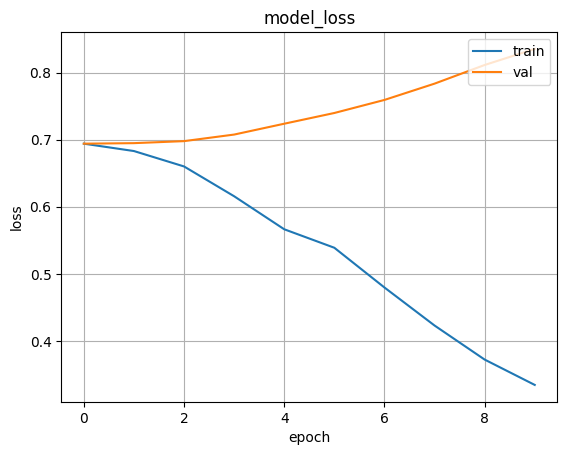

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

#### 3.1.3.2: Accuracy learning curves:

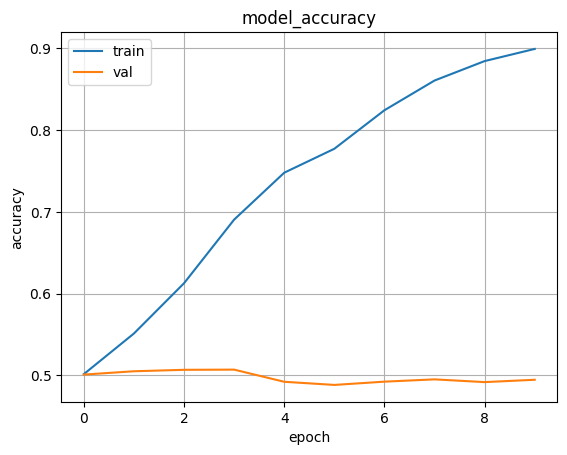

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

### 3.1.4: Evaluate the model performance on the Test Dataset:

In [ ]:
test_dataset=test_ds.map(vectorizer)
test_dataset=test_dataset.batch(BATCH_SIZE)
(test_loss, test_accuracy) = model.evaluate(test_dataset)
# Display a message
print("--------------------------------------------------------")
print("Performance evaluation on Test dataset:")
print("--------------------------------------------------------")
print(f"Test dataset accuracy = {100 * test_accuracy:.3f} %")
print("--------------------------------------------------------")

196/196 [==============================] - 11s 53ms/step - loss: 0.6934 - accuracy: 0.4984
--------------------------------------------------------
Performance evaluation on Test dataset:
--------------------------------------------------------
Test dataset accuracy = 49.840 %
--------------------------------------------------------


## 3.2: LSTM (MultiLayer and Bidirectional):
* Long Short-Term Memory layer - Hochreiter 1997 (LSTM):
  - tf.keras.layers.LSTM: https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
* tf.keras.layers.Bidirectional: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional

### 3.2.1: Define the model:



In [ ]:
# Define the dimension of the embedding matrix
EMBEDDING_DIM=64
# Define the LSTM model
model=tf.keras.models.Sequential([
    Input(shape=(SEQUENCE_LENGTH,)),
    # Apply the embedding layer
    Embedding(VOCAB_SIZE,EMBEDDING_DIM),
    # Apply Bidirectional-LSTM layer
    Bidirectional(LSTM(64,return_sequences=True)),
    # Apply Bidirectional-LSTM layer
    Bidirectional(LSTM(32)),
    # Dense layer with Relu activation function
    Dense(64, activation='relu'),
    # dropout layer
    Dropout(0.5),
    # Output layer with signoid activation functiuon for binary classification
    Dense(1,activation='sigmoid'),
])

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 250, 64)           640000    
                                                                 
 bidirectional (Bidirectiona  (None, 250, 128)         66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

### 3.2.2: Compile and train the model:

In [ ]:
checkpoint_filepath = './models/lstm.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history=model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[model_checkpoint_callback])

### 3.2.3: Generate the learning curves:

#### 3.2.3.1: The loss learning curves:

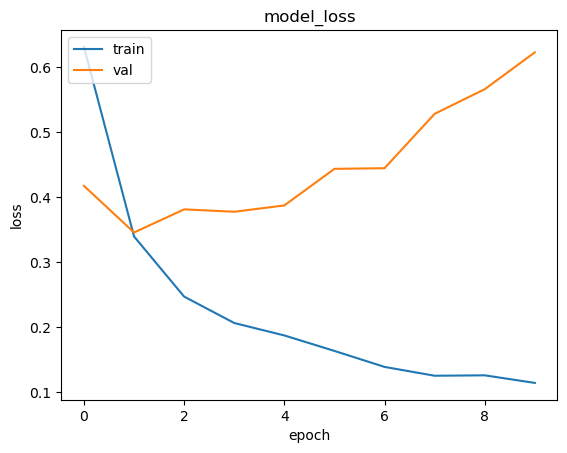

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

#### 3.2.3.2: The accuracy learning curves:

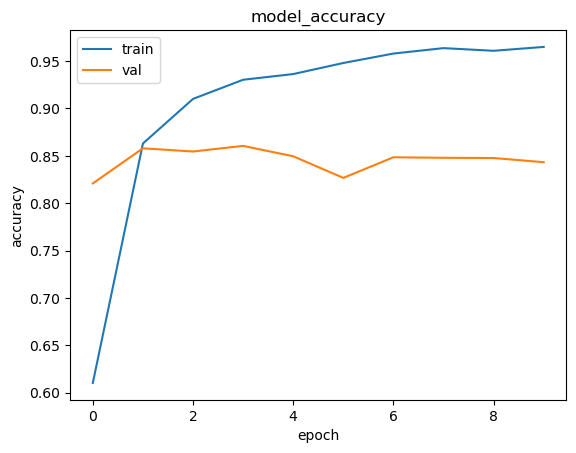

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

### 3.2.4: Evaluate the model performance on the Test dataset:

In [ ]:
test_dataset=test_ds.map(vectorizer)
test_dataset=test_dataset.batch(BATCH_SIZE)
(test_loss, test_accuracy) = model.evaluate(test_dataset)
# Display a message
print("--------------------------------------------------------")
print("Performance evaluation on Test dataset:")
print("--------------------------------------------------------")
print(f"Test dataset accuracy = {100 * test_accuracy:.3f} %")
print("--------------------------------------------------------")

196/196 [==============================] - 24s 122ms/step - loss: 0.6128 - accuracy: 0.8451


[0.6127853393554688, 0.8451200127601624]

## 3.3: GRU (MultiLayer and Bidirectional)

* Gated Recurrent Unit - Cho et al. 2014.:
  - tf.keras.layers.GRU: https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU


### 3.3.1: Define the model:

In [ ]:
# The dimension of the embedding matrix
EMBEDDING_DIM=64
# Define the model
model=tf.keras.models.Sequential([
    Input(shape=(SEQUENCE_LENGTH,)),
    Embedding(VOCAB_SIZE,EMBEDDING_DIM),

    Bidirectional(GRU(64,return_sequences=True)),
    Bidirectional(GRU(32)),

    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid'),
])

# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 250, 64)           640000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 250, 128)          49920     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                31104     
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                

### 3.3.2: Compile and train the model:

In [ ]:
checkpoint_filepath = './models/gru.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history=model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[])

Epoch 1/10
391/391 [==============================] - 22s 56ms/step - loss: 0.0988 - accuracy: 0.9740 - val_loss: 0.6141 - val_accuracy: 0.8408
Epoch 2/10
391/391 [==============================] - 23s 58ms/step - loss: 0.0851 - accuracy: 0.9772 - val_loss: 0.6760 - val_accuracy: 0.8400
Epoch 3/10
391/391 [==============================] - 24s 60ms/step - loss: 0.0828 - accuracy: 0.9788 - val_loss: 0.6422 - val_accuracy: 0.8424
Epoch 4/10
391/391 [==============================] - 24s 62ms/step - loss: 0.0780 - accuracy: 0.9798 - val_loss: 0.5859 - val_accuracy: 0.8426
Epoch 5/10
391/391 [==============================] - 22s 56ms/step - loss: 0.0705 - accuracy: 0.9821 - val_loss: 0.5898 - val_accuracy: 0.8377
Epoch 6/10
391/391 [==============================] - 33s 84ms/step - loss: 0.0671 - accuracy: 0.9832 - val_loss: 0.6181 - val_accuracy: 0.8284
Epoch 7/10
391/391 [==============================] - 24s 60ms/step - loss: 0.0601 - accuracy: 0.9863 - val_loss: 0.6479 - val_accuracy:

### 3.3.3: Generate the learning curves:

#### 3.3.3.1: Generate the loss-learning curves:

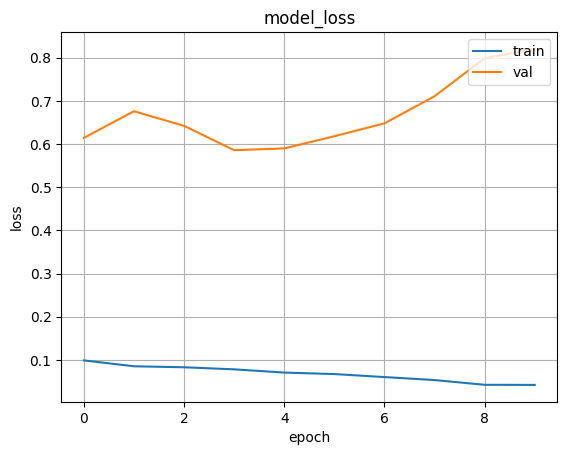

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

#### 3.3.3.1: Generate the accuracy-learning curves:

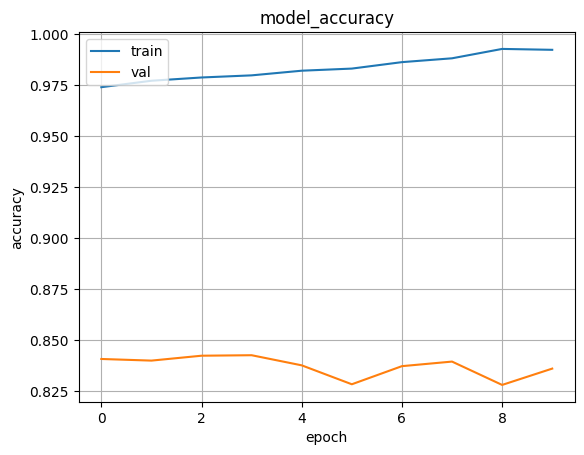

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

### 3.3.4: Evaluate the model performance on the Test dataset:

In [ ]:
test_dataset=test_ds.map(vectorizer)
test_dataset=test_dataset.batch(BATCH_SIZE)
(test_loss, test_accuracy) = model.evaluate(test_dataset)
# Display a message
print("--------------------------------------------------------")
print("Performance evaluation on Test dataset:")
print("--------------------------------------------------------")
print(f"Test dataset accuracy = {100 * test_accuracy:.3f} %")
print("--------------------------------------------------------")

196/196 [==============================] - 7s 34ms/step - loss: 0.8149 - accuracy: 0.8362
--------------------------------------------------------
Performance evaluation on Test dataset:
--------------------------------------------------------
Test dataset accuracy = 83.624 %
--------------------------------------------------------


## 3.4: 1D Convolutional Neural Networks (1D CNN) Model:
* 1D CNN layer (e.g. temporal convolution).:
  - tf.keras.layers.Conv1D: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

### 3.4.1: Define the model:

In [ ]:
# Define the embedding matrix dimension
EMBEDDING_DIM=300
model=tf.keras.models.Sequential([
    Input(shape=(SEQUENCE_LENGTH,)),
    Embedding(VOCAB_SIZE,EMBEDDING_DIM),

    Conv1D(32, 3, activation='relu',),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid'),
])

# Disply the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 300)          3000000   
                                                                 
 conv1d (Conv1D)             (None, 248, 32)           28832     
                                                                 
 flatten (Flatten)           (None, 7936)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                253984    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,282,849
Trainable params: 3,282,849
No

### 3.4.2: Compile and train the model:

In [ ]:
checkpoint_filepath = './models/conv_1d.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history=model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[model_checkpoint_callback])

Epoch 1/10
391/391 [==============================] - 78s 184ms/step - loss: 0.6910 - accuracy: 0.5272 - val_loss: 0.6818 - val_accuracy: 0.5822
Epoch 2/10
391/391 [==============================] - 14s 37ms/step - loss: 0.5097 - accuracy: 0.7618 - val_loss: 0.3476 - val_accuracy: 0.8571
Epoch 3/10
391/391 [==============================] - 14s 36ms/step - loss: 0.2855 - accuracy: 0.8907 - val_loss: 0.3092 - val_accuracy: 0.8705
Epoch 4/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2196 - accuracy: 0.9218 - val_loss: 0.3179 - val_accuracy: 0.8678
Epoch 5/10
391/391 [==============================] - 13s 33ms/step - loss: 0.1767 - accuracy: 0.9408 - val_loss: 0.3400 - val_accuracy: 0.8645
Epoch 6/10
391/391 [==============================] - 12s 29ms/step - loss: 0.1457 - accuracy: 0.9537 - val_loss: 0.3699 - val_accuracy: 0.8602
Epoch 7/10
391/391 [==============================] - 16s 41ms/step - loss: 0.1187 - accuracy: 0.9653 - val_loss: 0.4050 - val_accuracy

### 3.4.3: Generate the learning curves:

#### 3.4.3.1: Generate the loss-learning curves:

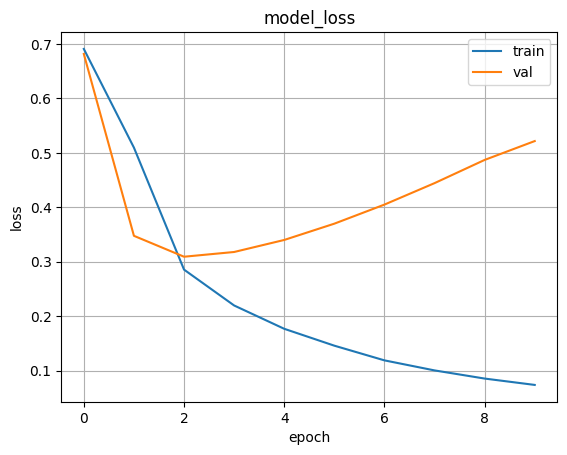

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

#### 3.4.3.2: Generate the accuracy-learning curves:

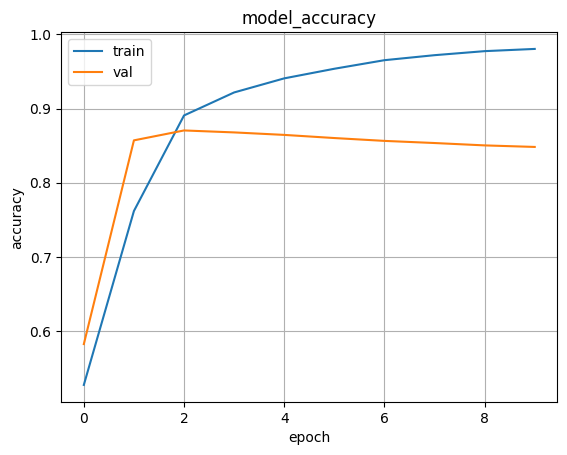

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

### 3.4.4: Evaluate the model performance on the Test dataset:

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
test_dataset=test_ds.map(vectorizer)
test_dataset=test_dataset.batch(BATCH_SIZE)
(test_loss, test_accuracy) = model.evaluate(test_dataset)
# Display a message
print("--------------------------------------------------------")
print("Performance evaluation on Test dataset:")
print("--------------------------------------------------------")
print(f"Test dataset accuracy = {100 * test_accuracy:.3f} %")
print("--------------------------------------------------------")

196/196 [==============================] - 4s 20ms/step - loss: 0.3118 - accuracy: 0.8679
--------------------------------------------------------
Performance evaluation on Test dataset:
--------------------------------------------------------
Test dataset accuracy = 86.792 %
--------------------------------------------------------


## 3.5: Transfer Learning: Using a pretrained Word2Vec [Gensim]
* We apply Treansfer Learning by making use of the embeddings of Word2Vec:
  - Word2Vec is a pre-trained vectors trained on a part of the Google News dataset (about 100 billion words).
  - The model contains 300-dimensional vectors for 3 million words and phrases. - The phrases were obtained using a simple data-driven approach described in 'Distributed Representations of Words and Phrases and their Compositionality'
    - https://huggingface.co/fse/word2vec-google-news-300

### 3.5.1: Load the pre-trained Word2Vec model:

In [ ]:
# Load the model
word2vec=api.load('word2vec-google-news-300')

[=================================================-] 100.0% 1662.0/1662.8MB downloaded


### 3.5.2: Explore the pre-trained Word2Vec model:

In [ ]:
# Examine the shape: vocab_dim x embedding_dim
print(f"word2vec.vectors.shape = {word2vec.vectors.shape}")

# Examine the vocab
# print(f"word2vec.vocab = {word2vec.vocab}")
print(f"len(word2vec['The']) = {len(word2vec['The'])}")

# Find the most similar word to "Man"
print(f"word2vec.most_similar('Man') = {word2vec.most_similar('Man')}")


word2vec.vectors.shape = (3000000, 300)
len(word2vec['The']) = 300
word2vec.most_similar('Man') = [('Woman', 0.6939345002174377), ('Boy', 0.5896925330162048), ('Girl', 0.584598958492279), ('Suspect', 0.5577560067176819), ('Couple', 0.5528685450553894), ('man', 0.5316051840782166), ('Robber', 0.5315312743186951), ('Teenager', 0.5161930322647095), ('depicts_Michelangelo_Creation', 0.5148172378540039), ('Policeman', 0.5136396884918213)]


In [ ]:
# A function to capitalize the first letter
def first_caps(word):
  return word[0].upper()+word[1:]

In [ ]:
# Test the function
print(f"vectorize_layer.get_vocabulary()[2] = {vectorize_layer.get_vocabulary()[2]}")
print(f"first_caps(vectorize_layer.get_vocabulary()[2]) = {first_caps(vectorize_layer.get_vocabulary()[2])}")
print(f"len(vectorize_layer.get_vocabulary()) = {len(vectorize_layer.get_vocabulary())}")

vectorize_layer.get_vocabulary()[2] = the
first_caps(vectorize_layer.get_vocabulary()[2]) = The
len(vectorize_layer.get_vocabulary()) = 10000


### 3.5.3: Get the pre-trained embeddings obtained from the pre-trained Word2vec model:

In [ ]:
# Initialize the pre-trained embeddings
pretrained_embeddings=[]
for i in range(len(vectorize_layer.get_vocabulary())):
  try:
    pretrained_embeddings.append(word2vec[vectorize_layer.get_vocabulary()[i]])
  except:
    print(vectorize_layer.get_vocabulary()[i])
    try:
      pretrained_embeddings.append(word2vec[first_caps(vectorize_layer.get_vocabulary()[i])])
      # print('toupper')
    except:
      # print('nosolution')
      pretrained_embeddings.append(random.normal(loc=0, scale=1, size=(EMBEDDING_DIM)))#reloaded_word_vectors[vectorize_layer.get_vocabulary()[i]])
  if i%1000==0:
    print('i = ',i)

# Convert to Numpy array
pretrained_embeddings_array=np.array(pretrained_embeddings)

#### 3.5.3.1: Save and reload the generated embeddings:




In [ ]:
# Check the shape of the pretrained embeddings
print(f"pretrained_embeddings_array.shape = {pretrained_embeddings_array.shape}")
# Save the embeddings
np.save('./models/pretrained_embeddings.npy',pretrained_embeddings_array)
# Load the saved pretrained embeddings
pretrained_embeddings_array=np.load('./models/pretrained_embeddings.npy')
# Check the shape of the loaded pretrained embeddings
print(f"pretrained_embeddings_array.shape = {pretrained_embeddings_array.shape}")

pretrained_embeddings_array.shape = (10000, 300)
pretrained_embeddings_array.shape = (10000, 300)


### 3.5.4: Define the model which makes use of the pre-trained embeddings:

In [ ]:
EMBEDDING_DIM=300
model=tf.keras.models.Sequential([
    Input(shape=(SEQUENCE_LENGTH,)),
    Embedding(
        VOCAB_SIZE,
        EMBEDDING_DIM,
        embeddings_initializer=tf.keras.initializers.Constant(pretrained_embeddings_array),
        trainable=True,
    ),

    Conv1D(32, 3, activation='relu',),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid'),
])

# Display the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 250, 300)          3000000   
                                                                 
 conv1d_1 (Conv1D)           (None, 248, 32)           28832     
                                                                 
 flatten_1 (Flatten)         (None, 7936)              0         
                                                                 
 dense_5 (Dense)             (None, 32)                253984    
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,282,849
Trainable params: 3,282,849
No

### 3.5.5: Compile and train the model:

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/MyProfDev/Udemy/NLP-Transformers/Sections--4-5/models/conv_1d_word2vec.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history=model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[model_checkpoint_callback])

Epoch 1/10
391/391 [==============================] - 55s 134ms/step - loss: 0.6959 - accuracy: 0.5088 - val_loss: 0.6927 - val_accuracy: 0.5115
Epoch 2/10
391/391 [==============================] - 15s 37ms/step - loss: 0.6904 - accuracy: 0.5231 - val_loss: 0.6919 - val_accuracy: 0.5206
Epoch 3/10
391/391 [==============================] - 15s 38ms/step - loss: 0.6649 - accuracy: 0.5821 - val_loss: 0.5511 - val_accuracy: 0.7529
Epoch 4/10
391/391 [==============================] - 15s 38ms/step - loss: 0.4248 - accuracy: 0.8134 - val_loss: 0.3596 - val_accuracy: 0.8484
Epoch 5/10
391/391 [==============================] - 17s 45ms/step - loss: 0.3127 - accuracy: 0.8726 - val_loss: 0.3271 - val_accuracy: 0.8604
Epoch 6/10
391/391 [==============================] - 17s 44ms/step - loss: 0.2621 - accuracy: 0.8974 - val_loss: 0.3207 - val_accuracy: 0.8643
Epoch 7/10
391/391 [==============================] - 17s 43ms/step - loss: 0.2216 - accuracy: 0.9177 - val_loss: 0.3152 - val_accuracy

### 3.5.6: Generate the learning curves:

#### 3.5.6.1: Generate the loss-learning curves:

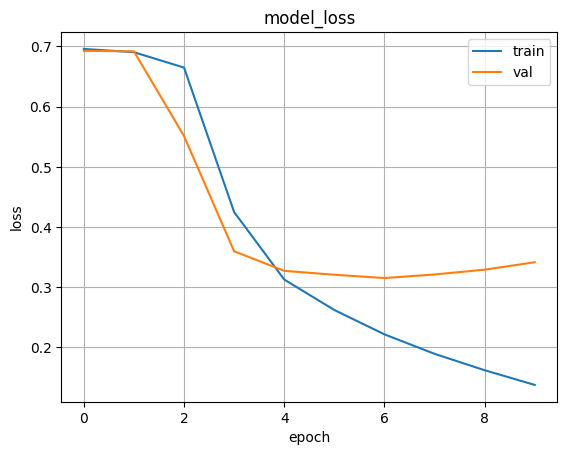

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

#### 3.5.6.2: Generate the accuracy-learning curves:

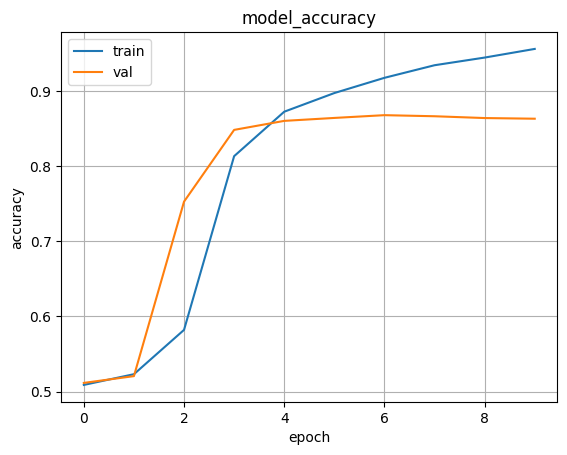

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

### 3.5.7: Evaluate the model performance on the Test dataset:

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
test_dataset=test_ds.map(vectorizer)
test_dataset=test_dataset.batch(BATCH_SIZE)
(test_loss, test_accuracy) = model.evaluate(test_dataset)
# Display a message
print("--------------------------------------------------------")
print("Performance evaluation on Test dataset:")
print("--------------------------------------------------------")
print(f"Test dataset accuracy = {100 * test_accuracy:.3f} %")
print("--------------------------------------------------------")

196/196 [==============================] - 4s 19ms/step - loss: 0.3221 - accuracy: 0.8614
--------------------------------------------------------
Performance evaluation on Test dataset:
--------------------------------------------------------
Test dataset accuracy = 86.136 %
--------------------------------------------------------


## 4. End of Sucessful Execution:
* Display a successful end of execution message


In [32]:
#-------------------------------------------------------------------------------
# Display a final message
#-------------------------------------------------------------------------------
# Current time
now = datetime.datetime.now()
# Display a message
print('Program executed successfully on: '+ str(now.strftime("%Y-%m-%d %H:%M:%S") + "...Good-bye!\n"))

Program executed successfully on: 2023-07-14 00:24:33...Good-bye!

